In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

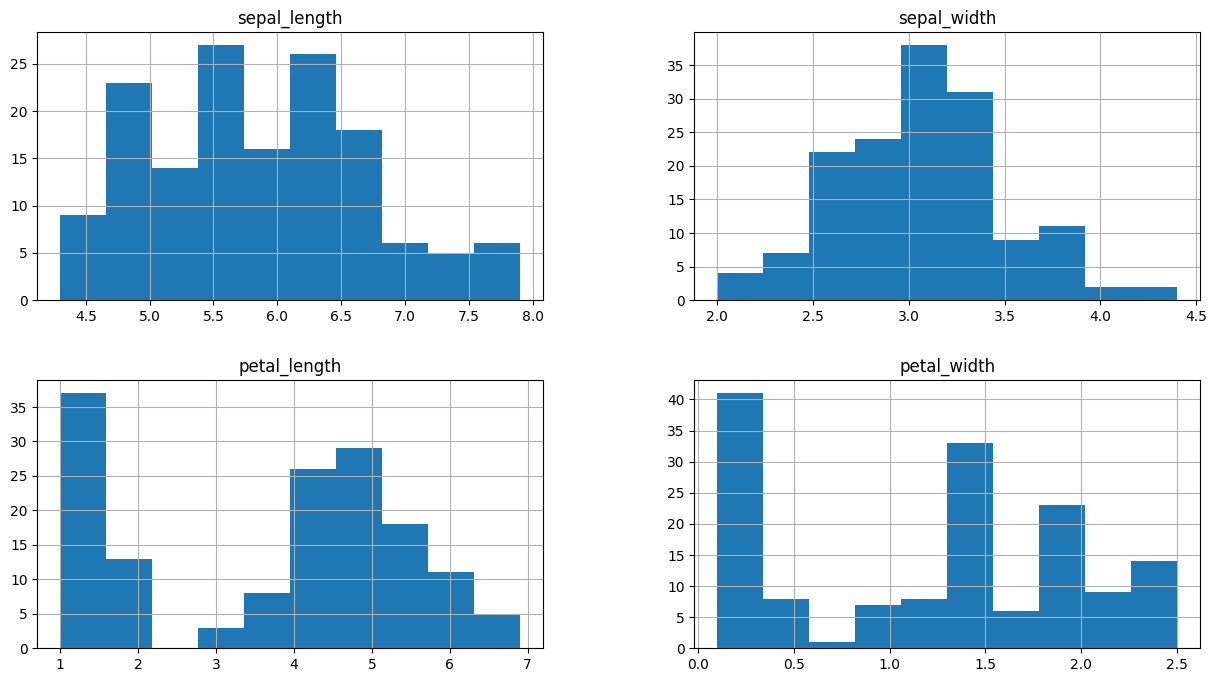

In [5]:
data.hist(figsize=(15,8))

<Axes: title={'center': 'Species Vs Sepal length'}, xlabel='species', ylabel='sepal_length'>

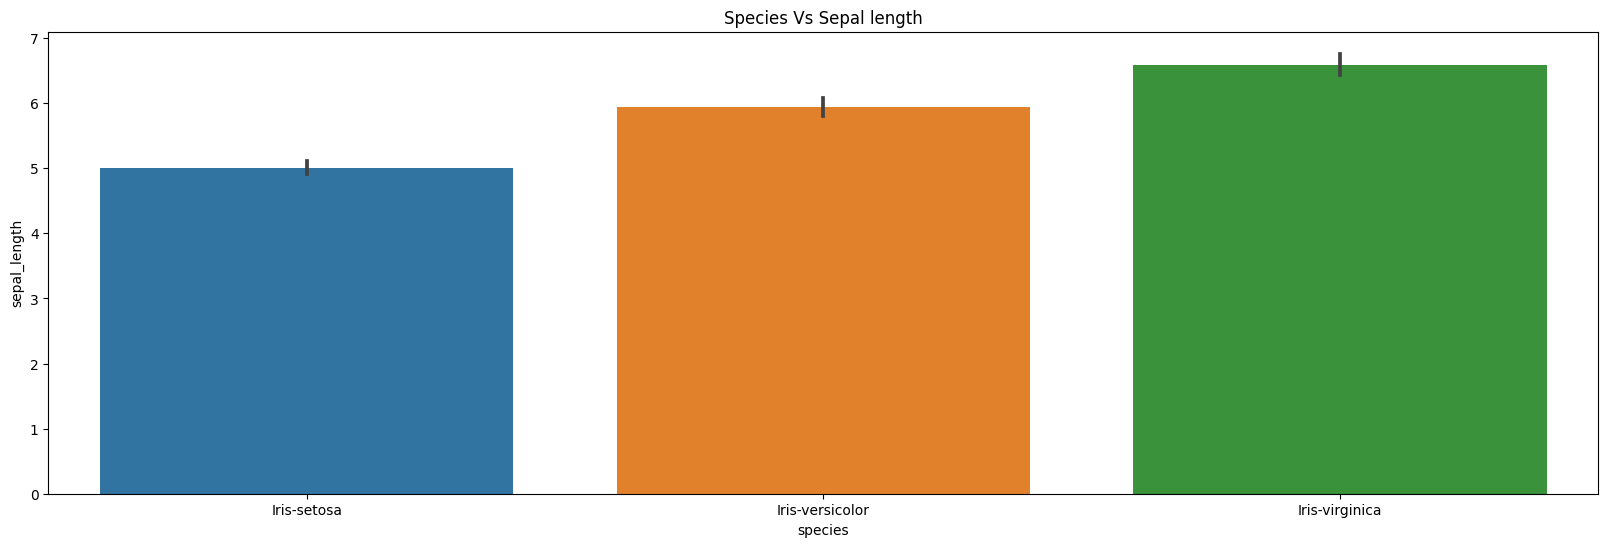

In [6]:
plt.figure(figsize=(20,6))
plt.title("Species Vs Sepal length")
sns.barplot(data=data,x='species',y='sepal_length')

<Axes: title={'center': 'Species Vs Sepal width'}, xlabel='species', ylabel='sepal_width'>

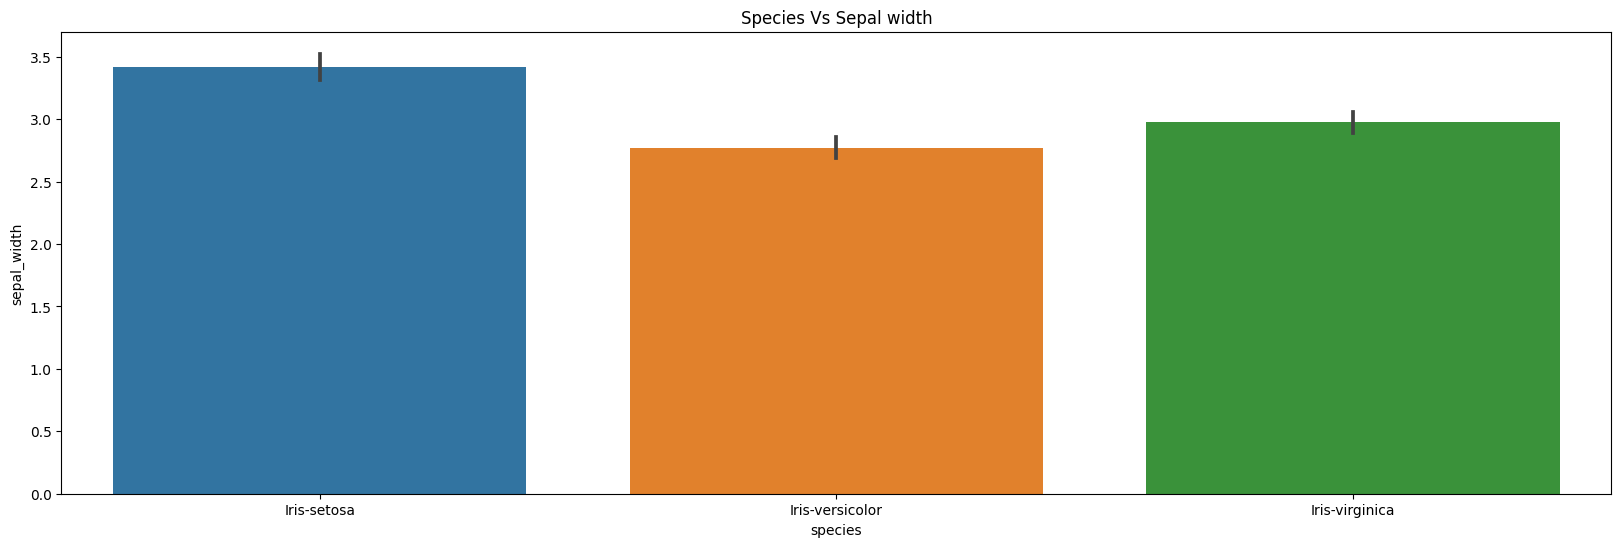

In [7]:
plt.figure(figsize=(20,6))
plt.title("Species Vs Sepal width")
sns.barplot(data=data,x='species',y='sepal_width')

<Axes: title={'center': 'Species Vs petal length'}, xlabel='species', ylabel='petal_length'>

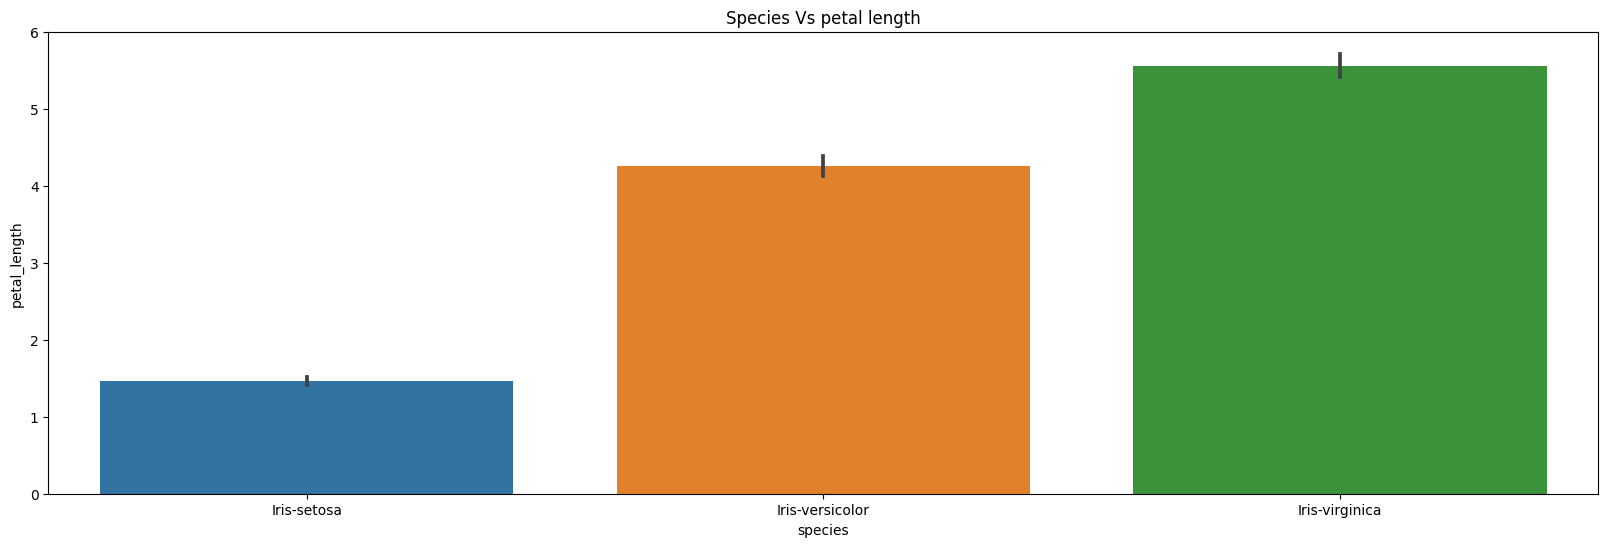

In [8]:
plt.figure(figsize=(20,6))
plt.title("Species Vs petal length")
sns.barplot(data=data,x='species',y='petal_length')

<Axes: title={'center': 'Species Vs petal width'}, xlabel='species', ylabel='petal_width'>

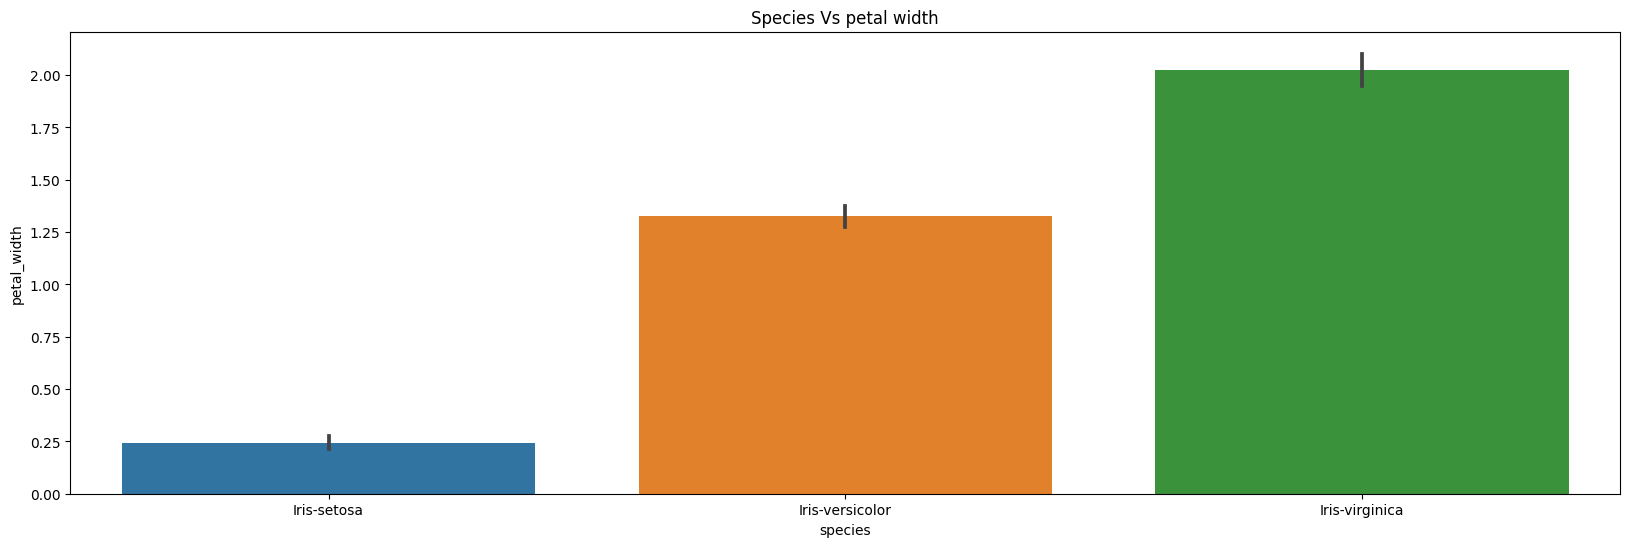

In [9]:
plt.figure(figsize=(20,6))
plt.title("Species Vs petal width")
sns.barplot(data=data,x='species',y='petal_width')

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['species'] = le.fit_transform(data['species'])
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<Axes: >

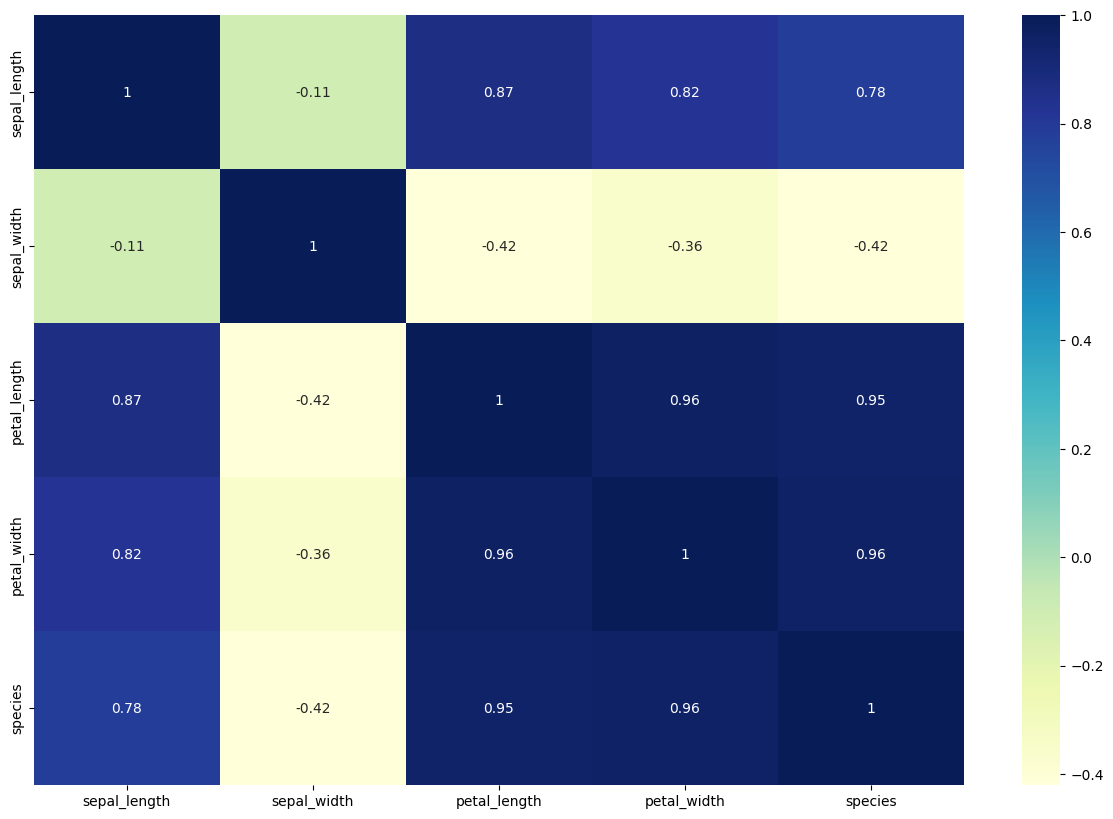

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True)

In [12]:
x = data.drop(['species'],axis=1)
y = data['species']

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2)

In [14]:
from sklearn.tree import DecisionTreeClassifier
dtr = DecisionTreeClassifier()
dtr.fit(x_train,y_train)

DecisionTreeClassifier()

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
pred = dtr.predict(x_test)
accuracy_score(pred,y_test)

0.9